## 인스타 그램 크롤링 : 제일 뜨는 제주도 맛집

* 참조 교재와 깃허브 :https://github.com/Play-with-data/datasalon/blob/master/02_%EA%B0%9C%EC%A0%95%ED%8C%90/5_Jeju_Hotplace/5_1_Instagram_Crawling.ipynb

* 필요한 설정 셋팅

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 예제 5-1 chromedriver 열기
from selenium import webdriver

driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe') 

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_14792/69865118.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe')


: driver 창이 검색 및 크롤링을 수행하는 창

In [14]:
# 예제 5-2 인스타그램 접속하기
import time

# 인스타그램 접속하기
driver.get('https://www.instargram.com')
time.sleep(2)

* 이후 크롬 드라이버 창에서 로그인 수행

### 인스타 그램 검색 수행 

In [15]:
# 예제 5-4 검색결과 URL 만드는 함수
def insta_searching(word):
    
    url = 'https://www.instagram.com/explore/tags/' + word # 인스타 검색시 주소 형식
    return url    

In [19]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [22]:
driver.page_source[:1000]

'<html lang="ko" class="js logged-in client-root js-focus-visible sDN5V" style="--desktop-nav-height:60px; --post-element-padding:16px;"><head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n        <title>#제주도맛집 해시태그 • Instagram 사진 및 동영상</title>\n\n        \n        <meta name="robots" content="noimageindex, noarchive">\n        <meta name="apple-mobile-web-app-status-bar-style" content="default">\n        <meta name="mobile-web-app-capable" content="yes">\n        <meta name="theme-color" content="#ffffff">\n        <meta id="viewport" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover">\n        <link rel="manifest" href="/data/manifest.json">\n\n        <link rel="preload" href="/static/bundles/es6/ConsumerUICommons.css/3cfda9c2adcb.css" as="style" type="text/css" crossorigin="anonymous">\n<link rel="preload" href="/static/bundles/es6/Consumer.css/6978b906a143.css" as=

* 첫번째 게시물 열기 

: 크롬 확인 결과 게시물 페이지 소스 < div calss = "_9AhH0">< /div >

In [29]:
# 함수로 구현 
def select_first(driver) :
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)  # 3초간 대기 

In [75]:
select_first(driver)

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_7100/2547080320.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


* 게시물 정보 가져오기 
: 본문 내용 :( < div class = "MOdxS" > span)[0]     

  해시태그 :( 본문 내에서 # )    
  
  작성일 :( < time class="_1o9PC Nzb55" datetime="2022-02-18T03:08:24.000Z" title="2022년 2월 18일">4시간 전 < /time >    
  
  위치정보 :( < div class="M30cS" >)   
  
  좋아요 수 :( < div class="_7UhW9   xLCgt        qyrsm KV-D4              fDxYl    T0kll ">좋아요 < span >1,409< /span>개< /div> )

: 본문내용 div와 좋아요 div 내가한것이 맞음( 변경되었음)

In [4]:
from bs4 import BeautifulSoup
import unicodedata

In [54]:
# 게시물 정보를 가져오는 함수 
import re  # re : 정규표현식

def get_content(driver) : 
    # 현재 페이지 html 소스 가져오기 
    html = driver.page_source 
    soup = BeautifulSoup(html, 'html.parser') # html 형식
    
    # 본문 내용 가져오기 
    try:
        content = soup.select('div.MOdxS > span')[0].text
        content = unicodedata.normalize('NFC', content) 
    except:
        content = ' '
        
    # 본문 내 해시태그 
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    # 작성일자 
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10] #년-월-일
    
    # 좋아요 수 
    try : 
        like = soup.select('div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll >span')[0].text
    except :
        like = 0
    
    # 위치정보 
    try : 
        place = soup.select('div.M30cS')[0].text
    except :
        place = ''

    # 수집한 정보 저장
    data = [content, date, like, place , tags]
    return data
        

In [55]:
get_content(driver)

['📍JEJU제주도로 여행가는 분들을 위한 찐맛집총정리🍽공항에서부터 한바퀴 시계방향으로 정리해봤습니다.⠀제주도_시계방향_맛집총정리🌟_[2022년 2월버전]⠀제주시⬆️ (12시방향 공항)👉🏻신해바라기분식 - 순두부👉🏻제주미담 - 순대모듬👉🏻연북로명태명가 - 명태조림정식💯👉🏻부온 - 텐동, 소바👉🏻수복강녕 - 돼지떡갈비👉🏻행복미가 - 흑미삼계탕⠀👉🏻더한근 - 흑돼지근고기+물밀면💯👉🏻훔쳐온뒷고기 - 흑돼지 머릿고기👉🏻운산식당 - 흑돼지 근고기👉🏻명호마농갈비 - 마농갈비⠀👉🏻옐로우돕 - 와인바👉🏻느루온 - 요리주점👉🏻엘리펀트힙 - 양식당⠀👉🏻보람수산 - 고등어회👉🏻스시호시카이 - 오마카세👉🏻서문수산 - 오마카세💯⠀👉🏻제주회심 - 고등어소바👉🏻희야국수 - 멸치고기국수(공항1분)👉🏻국수만찬 - 고기국수💯👉🏻골막식당 - 고기국수⠀조천↗️👉🏻백리향 - 백반👉🏻각지불 - 아구탕⠀함덕↗️👉🏻함덕골목 - 내장탕💯👉🏻오늘도회는뜬다 - 숙성회👉🏻대성아귀찜 - 아귀대창찜👉🏻별미해장국 - 돌솥비빔밥,내장탕👉🏻보배쌤보리김치와게장 - 간장게장정식💯⠀김녕↗️👉🏻좀여네집 - 모듬해산물, 성게전복죽👉🏻임풍해장국 - 왕갈비탕👉🏻김녕회관 - 혼술펍⠀월정리↗️👉🏻떡하니 - 문어떡볶이👉🏻배고프면 - 문어해물라면💯👉🏻타코마씸 - 흑돼지타코⠀세화↗️👉🏻모다정 - 접짝뼈국,두루치기💯👉🏻홍성원 - 간짜장,볶음밥👉🏻얌얌돈까스 - 치즈돈까스👉🏻숙경식당 - 돼지갈비👉🏻서울국수가게 - 순두부👉🏻제주유 - 유부초밥👉🏻인손 - 참다랑어, 딱새우👉🏻테네시테이블 - 수제버거⠀종달리↗️👉🏻종달해녀의집 - 해산물👉🏻산도롱맨도롱 - 홍갈비국수💯⠀성산➡️👉🏻목화휴게소 - 준치+맥주🦑👉🏻시흥해녀의집식당 - 조개국👉🏻새벽숯불가든 - 흑돼지오겹살👉🏻고등어쌈밥 - 고등어조림💯👉🏻성산마씸 - 갈치조림,옥돔구이👉🏻브라보비치 - 카페🌈⠀표선↘️👉🏻올레당케국수 - 보말칼국수👉🏻고수목마 - 말고기👉🏻가시식당 - 두루치기, 몸국⠀남원↘️👉🏻의귀리부부막국수 - 돈까스,물막국수👉🏻별맛해장국 - 소고기해장국👉🏻신례토종닭식당 - 오리숯불구이👉🏻소낭식당 -

* 다음 게시물 열기 : 우측 버튼 클릭  (div class l8mY4.feth3)


In [67]:
def move_next(driver):

    right = driver.find_element_by_css_selector('div.l8mY4.feth3')
    right.click()
    time.sleep(3)

In [65]:
move_next(driver)

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_7100/223539478.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3')


### 여러 게시글 정보를 수집
1. 크롬 브라우저 열기 
2. 인스타 그램 검색 페이지 url 만들기
3. 검색 페이지 접속  
4. 첫번째 게시물 클릭 
5. result [] 만들기 
6. 게시물 정보 수집하기 
7. 게시물 results에 추가하기 
8. 다음 게시물 선택 
9. 완료 (target) 횟수 지정

* 함수로 구현

In [68]:
from selenium import webdriver 
from bs4 import BeautifulSoup
import time 
import re

In [72]:
#① 크롬 브라우저 열기
driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe') 

# 추가) 인스타그램 접속후, 로그인 하기  - 
driver.get('https://www.instargram.com')
time.sleep(2)
# 로그인 직접

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_7100/1277785024.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe')


In [78]:
word = "제주도맛집"    #검색어
url = insta_searching(word)
time.sleep(3)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_7100/2547080320.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


In [79]:
# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 50      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)


C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_7100/278784341.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3')


In [80]:
print(results[:2])

[["길게 말 안합니다. 그냥 가시면 됩니다.낙지볶음 찐맛집이다. 정말 눈물 흘리면서 흡입했다.제주공항에서 차로 10분정도 거리에 있는 매장인데,근처 노포인 [시골길] 사장님의 아들분께서 운영하는 곳이다.메뉴는 [낙지새우버섯볶음]을 먹으면 된다.통통한 낙지와 새우를 버섯과 함께 매콤하게 볶아냈다.일단 낙지가 정말 신선하고, 양념 맛이 끝내준다.식단조절 중인데도 정신없이 흡입하고 공기밥 추가를 외쳤다.게다가 정말 든든한게 따로 추가를 안해도,오이냉국 / 청국장 / 공기밥 / 소면이 기본으로 같이 나온다.제공되는 소면을 양념에 잘 비벼서 호로록해도 좋다.공기밥은 큰 대접에 흰 쌀밥을 가득 담아주시는데,테이블마다 놓여진 김가루/참기름을 넣고,콩나물/미역/무채까지 곁들여 비빔밥으로 먹으면 된다.입에 매운맛이 감돌면 오이냉국으로 시원하게 달래주고,속이 허하면 청국장으로 뜨끈하게 달래주면 된다.아마 여기서 상상이상으로 배를 많이 채울거다.뒤에 여행 일정에 당분간 먹는 일정은 빼도록 하자.'시골길'과 '낙지로' 둘 다 먹어본 입장으로,고민되는 사람들을 위해 말하자면 [낙지로]를 더 추천한다.낙지볶음 자체를 낙지로에서 월등하게 맛있게 먹었기 때문이다.시골길의 그 어머님 손맛 가득한 청국장이 넘사벽이긴 하지만,낙지볶음이 밋밋해서 아쉬웠는데, 낙지로는 간이 제대로 잡혔다.특히 밥과 소면과 먹으면 정말 끝없이 흡입이 가능하다.웨이팅이 조금 있을 수 있지만 포장도 가능하고,맵기조절도 가능하니 맵찔이도 안심하고 가도 된다.- 매장 : 제주 #낙지로- 위치 : 제주 제주시 연동 292-25- 시간 : 매일 10시~15시 (일요일 휴무)- 포장전화 : 064-743-9363- 주차는 바로 옆에 공영주차장 위치#푸민_제주#제주도맛집 #제주공항맛집 #제주도공항근처맛집 #제주도공항맛집 #제주공항근처맛집 #제주맛집 #제주도여행 #제주여행코스 #제주여행 #제주도가볼만한곳 #제주도민맛집 #연동맛집 #제주공항맛집추천 #맛집추천 #제주도게스트하우스 #제주도술집 #제주시맛집 #맛집", '2022-02-

* result 양식 : content , date, like, place, tags

In [82]:
result_df = pd.DataFrame(results,
                        columns = ['content', 'date','like','place','tags'])
result_df.head()

,content,date,like,place,tags
0,길게 말 안합니다. 그냥 가시면 됩니다.낙지볶음 찐맛집이다. 정말 눈물 흘리면서 흡...,2022-02-17,"1,511",낙지로,"[#낙지로-, #푸민_제주, #제주도맛집, #제주공항맛집, #제주도공항근처맛집, #..."
1,(광고)제주도에서 가장 맛있는 갈치요리 끝판왕 👑갈치왕!갈치요리는 무적권 여기가 진...,2022-02-18,0,,[#제주도맛집]
2,(광고)지만 제주 공항에서 가깝고 (🚗공항에서 12분)오션뷰& 노을뷰를 보면서 먹을...,2022-02-18,0,,"[#제주도맛집, #제주맛집, #제주도횟집, #제주시횟집, #제주공항근처횟집, #제주..."
3,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,2022-02-18,0,,"[#제주분식, #제주분식, #모당모당, #돔베라면돔베김밥, #제주맛집, #제주도맛집..."
4,📍JEJU제주도로 여행가는 분들을 위한 찐맛집총정리🍽공항에서부터 한바퀴 시계방향으로...,2022-02-18,"1,593",제주도 제주,"[#자리돔횟집, #유달식당, #몰질식육식당, #제주선채향, #화순평양면옥, #우무,..."


In [84]:
# 엑셀 파일화 
result_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/insta_jeju_hotplace.xlsx')

* 키워드: 제주도맛집베스트

In [86]:
word = "제주도맛집베스트"    #검색어
url = insta_searching(word)
time.sleep(5)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_7100/2547080320.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


In [87]:
# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 50      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)


C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_7100/278784341.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3')


In [89]:
results[:2]

[['🤍\u2063\u2063🥩 애월 바다뷰 맛집 "애월리식당" 🥩\u2063\u2063별점 - 🌟🌟🌟🌟🌟 x100000000\u2063N사 평점 - 4.57점\u2063\u2063\u2063SNS에서 가장 핫한 인스타 갬성 오션뷰 맛집 💙\u2063애월바다를 한 눈에 보면서 흑돼지 고기 한 점! 💛\u2063깔끔한 인테리어와 넓은 테이블로 먹는 내내 편안하게,, 🖤\u2063초벌하기 전, 생육 상태를 체크해볼 수 있어서 신뢰도 상승! 💜\u2063\u2063런치 세트도 완죠니 푸짐해서 점심메뉴로도 딱! 알맞게! ❤\u2063다양한 구성의 밑반찬에도 정성 한스푼까지! 🥰💕\u2063도톰한 지방의 흑돼지 근고기, 직원분이 \'직접\' 구워주셔서 더 존맛탱! 😋😋\u2063\u2063\'애월리식당\' 에서는 바다를 감상하면서 동시에,\u2063아주 개맛도리인 흑돼지 근고기를 맛볼 수 있슘당!!!!\u2063\u2063\u2063💗 BEST MENU 💗\u2063◾숙성흑돼지 점심특선 2인 - 45,000원\u2063◾흑돼지 근고기 600G - 57,000원\u2063◾해물 된장찌개 - 7,000원\u2063◾흑돼지 김치찌개 - 7,000원\u2063◾김치말이국수 - 6,000원\u2063\u2063•·················information·····················•\u2063\u2063🏠  애월리식당\u2063📞  064-711-3733\u2063🛣  제주 제주시 애월읍 애월해안로 907 1층\u2063⏰  매일 11:00 - 23:00 (연중무휴, 브레이크타임X)\u2063 LUNCH TIME 11:00 - 14:00\u2063\u2063✔애월해안도로 초입부 위치!\u2063✔제주공항에서 차로 20분!\u2063\u2063•··························•·······························•\u2063\u2063#애월맛집 #애월흑돼지 #애월흑돼지맛집 #애월흑돼지맛집추천 #애월맛집인정 #제주맛집탐방 #제주

In [91]:
result_df = pd.DataFrame(results,
                        columns = ['content', 'date','like','place','tags'])
result_df.head(10)

,content,date,like,place,tags
0,"🤍⁣⁣🥩 애월 바다뷰 맛집 ""애월리식당"" 🥩⁣⁣별점 - 🌟🌟🌟🌟🌟 x10000000...",2022-02-12,0,,"[#애월맛집, #애월흑돼지, #애월흑돼지맛집, #애월흑돼지맛집추천, #애월맛집인정,..."
1,🎀 애월에 진짜 맛집 🎀⁣⁣문개항아리 (づ￣ 3￣)づ⁣⁣⁣직접 잡아오는 제주도 자연...,2022-01-28,0,,"[#제주애월맛집, #애월핫플, #제주도애월맛집, #애월맛집인정, #제주맛집탐방, #..."
2,"🤍⁣⁣🥩 애월 바다뷰 맛집 ""애월리식당"" 🥩⁣⁣별점 - 🌟🌟🌟🌟🌟 x10000000...",2022-02-15,0,,"[#제주맛집, #애월흑돼지, #애월흑돼지맛집, #애월흑돼지맛집추천, #애월맛집인정,..."
3,"🤍⁣⁣🥩 애월 바다뷰 맛집 ""애월리식당"" 🥩⁣⁣별점 - 🌟🌟🌟🌟🌟 x10000000...",2022-01-29,0,,"[#애월맛집, #애월흑돼지, #애월흑돼지맛집, #애월흑돼지맛집추천, #애월맛집인정,..."
4,"🤍⁣⁣🥩 애월 바다뷰 맛집 ""애월리식당"" 🥩⁣⁣별점 - 🌟🌟🌟🌟🌟 x10000000...",2022-01-22,0,,"[#애월맛집, #애월흑돼지, #애월흑돼지맛집, #애월흑돼지맛집추천, #애월맛집인정,..."
5,"🖤✨ 제주 한림 흑돼지 찐맛집, ""이어돈가"" ✨🍖""흑돼지 돈마호크""🍖한번 맛보면 핵...",2022-02-18,0,,"[#제주도맛집, #제주도현지인맛집, #제주도맛집베스트, #제주도맛집투어, #제주맛집..."
6,"🖤⁣⁣⁣⁣⁣✨ 제주 한림 흑돼지 찐맛집, ""이어돈가"" ✨⁣⁣⁣🍖""흑돼지 돈마호크""🍖...",2022-02-15,0,,"[#제주도맛집, #제주도현지인맛집, #제주도맛집베스트, #제주도맛집투어, #제주맛집..."
7,"🤍⁣⁣🥩 애월 바다뷰 맛집 ""애월리식당"" 🥩⁣⁣별점 - 🌟🌟🌟🌟🌟 x10000000...",2022-01-30,0,,"[#애월맛집, #애월흑돼지, #애월흑돼지맛집, #애월흑돼지맛집추천, #애월맛집인정,..."
8,"🤍🥩 애월 바다뷰 맛집 ""애월리식당"" 🥩별점 - 🌟🌟🌟🌟🌟 x100000000N사 ...",2022-02-18,0,,"[#제주맛집, #애월흑돼지, #애월흑돼지맛집, #애월흑돼지맛집추천, #애월맛집인정,..."
9,아~ 해봐 내가 먹여줄게 🥄.#협찬 인데 찐맛집🔥어박사 한림본점 다녀왔어요😆.갈치조...,2022-02-18,774,어박사,"[#협찬, #어박사한림점, #한림맛집, #협재맛집, #제주갈치조림, #한림읍맛집, ..."


In [92]:
#insta_jeju_best
result_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/insta_jeju_best.xlsx')

* 키워드 제주도 맛집추천

In [196]:
word = "제주도맛집추천"    #검색어
url = insta_searching(word)
time.sleep(5)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_7100/2547080320.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


In [197]:
# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 50      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)


C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_7100/278784341.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  right = driver.find_element_by_css_selector('div.l8mY4.feth3')


In [198]:
result_df = pd.DataFrame(results,
                        columns = ['content', 'date','like','place','tags'])
result_df.head(10)

,content,date,like,place,tags
0,<광고>#제주분식 https://jejubunsig.modoo.at/ 제주시 귀아...,2022-02-18,0,,"[#제주분식, #제주분식, #모당모당, #돔베라면돔베김밥, #제주맛집, #제주도맛집..."
1,광고서귀포 신상 맛집🤩👍💯사우스포레스트@southforest_official_제주 ...,2022-02-17,0,,"[#사우스포레스트🔅주소, #서귀포맛집, #서귀포카페, #협재맛집, #제주도맛집, #..."
2,"<광고>제주 핫플 레스토랑👍레스토랑 인테리어 느낌있구요누룽지파스타, 문어파스타, 전...",2022-02-17,0,,"[#이스트포레스트💠제주시, #월정리맛집, #성산일출봉맛집, #우도맛집, #성산맛집,..."
3,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,2022-02-16,0,,"[#제주분식, #제주분식, #모당모당, #돔베라면돔베김밥, #제주맛집, #제주도맛집..."
4,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,2022-02-17,0,,"[#제주분식, #제주분식, #모당모당, #돔베라면돔베김밥, #제주맛집, #제주도맛집..."
5,제주여행 2일차오늘은 #제주분식 에서 아침먹고 시작!돔베가 올라간 라면이랑 모듬분식...,2022-02-16,111,,"[#제주분식, #제주맛집, #제주도맛집, #제주공항맛집, #제주도공항근처맛집, #연..."
6,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,2022-02-17,0,,"[#제주분식, #제주분식, #모당모당, #돔베라면돔베김밥, #제주맛집, #제주도맛집..."
7,광고서귀포 신상 맛집🤩👍💯사우스포레스트@southforest_official_제주 ...,2022-02-17,0,,"[#사우스포레스트🔅주소, #서귀포맛집, #서귀포카페, #협재맛집, #제주도맛집, #..."
8,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,2022-02-17,0,,"[#제주분식, #제주분식, #모당모당, #돔베라면돔베김밥, #제주맛집, #제주도맛집..."
9,제주도 가족여행#제주분식아이들도 좋아하고 부모님들도 넘 맛있게 잘 드셨어요^^..제...,2022-02-18,0,,"[#제주분식아이들도, #제주맛집, #제주도맛집, #제주공항맛집, #제주도공항근처맛집..."


In [199]:
# 엑셀 파일화 
result_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/insta_jeju_food.xlsx')

###  여러 엑셀 파일 중복 제거 후 통합저장 

In [202]:
#여러 개의 저장파일 통합하기
jeju_insta_df = pd.DataFrame( [ ] )

folder = 'C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/'
f_list = ['insta_jeju_hotplace.xlsx', 'insta_jeju_best.xlsx','insta_jeju_food.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns =['index','content','date','like','place','tags']


In [203]:
# 중복제거
jeju_insta_df.drop_duplicates(subset = ["content"] , inplace = True)
jeju_insta_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/1_crawling_raw.xlsx', index = False)

## 워드 클라우드 
: 해시태그 정보들을 워드 클라우드로 시각화

In [204]:
import pandas as pd 
raw_total = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#낙지로-', '#푸민_제주', '#제주도맛집', '#제주공항맛집', '#제주도...
1                                           ['#제주도맛집']
2    ['#제주도맛집', '#제주맛집', '#제주도횟집', '#제주시횟집', '#제주공항...
Name: tags, dtype: object

In [205]:
# 해시태그를 통합 저장 
# 딕 - A: n회 , B : n회 ... 
tags_total = []

for tags in raw_total['tags'] :
    print(tags)
    tags_list = tags[2 :-2].split("', '")   # tags 내용 형식 [ '#~'  ~'#태그 ' ]
    for tag in tags_list :
        tags_total.append(tag)
        

['#낙지로-', '#푸민_제주', '#제주도맛집', '#제주공항맛집', '#제주도공항근처맛집', '#제주도공항맛집', '#제주공항근처맛집', '#제주맛집', '#제주도여행', '#제주여행코스', '#제주여행', '#제주도가볼만한곳', '#제주도민맛집', '#연동맛집', '#제주공항맛집추천', '#맛집추천', '#제주도게스트하우스', '#제주도술집', '#제주시맛집', '#맛집']
['#제주도맛집']
['#제주도맛집', '#제주맛집', '#제주도횟집', '#제주시횟집', '#제주공항근처횟집', '#제주시내횟집', '#용두암근처맛집', '#용두암맛집', '#제주횟집추천', '#제주도공항근처횟집', '#도두맛집', '#이호테우해변맛집', '#제주공항맛집']
['#제주분식', '#제주분식', '#모당모당', '#돔베라면돔베김밥', '#제주맛집', '#제주도맛집', '#제주시맛집', '#제주공항근처맛집', '#제주공항맛집', '#제주맛집추천', '#제주도맛집추천', '#제주현지인맛집', '#제주가볼만한곳', '#제주도먹거리', '#제주여행', '#제주도여행', '#애월맛집', '#제주연동맛집', '#제주해물라면']
['#자리돔횟집', '#유달식당', '#몰질식육식당', '#제주선채향', '#화순평양면옥', '#우무', '#호커센터', '#제주도', '#제주여행']
['#제주도맛집', '#제주맛집', '#제주공항맛집', '#이호테우해변맛집', '#제주갈치조림맛집', '#제주도갈치조림맛집', '#제주갈치조림', '#제주도갈치조림', '#제주시내맛집', '#제주도민맛집', '#제주현지인맛집']
['#협재술시', '#협재맛집', '#협재술집', '#제주협재맛집', '#제주맛집', '#제주도맛집', '#친스타그램', '#소통', '#좋아요테러', '#셀스타그램', '#좋반', '#likeforfollow', '#인친', '#like4likes', '#좋아요반사', '#좋아요', '#여행', '#맞팔해요', '#followmeplease', '#follow', '#선팔하면맞팔'

In [206]:
tags_list

['#애월맛집',
 '#애월카페',
 '#애월읍맛집',
 '#제주애월맛집',
 '#제주도맛집',
 '#제주맛집',
 '#제주카페',
 '#외도맛집',
 '#하귀맛집',
 '#협재맛집',
 '#협재해수욕장',
 '#한림맛집',
 '#한림카페',
 '#애월해안도로맛집',
 '#애월가볼만한곳',
 '#제주공항맛집',
 '#제주데이트',
 '#제주공항근처맛집',
 '#한담맛집',
 '#제주해안도로',
 '#제주맛집추천',
 '#제주도맛집추천',
 '#제주도민맛집']

In [207]:
tag

'#제주도민맛집'

In [208]:
len(tags_total) # 원소 1개당 게시글 하나의 태그 모음 

1312

* 해시태그 출현 빈도 집계 : Counter 함수 

In [209]:
from collections import Counter 
tags_counts = Counter(tags_total)

In [210]:
tags_counts.most_common(50)

[('#제주도맛집', 58),
 ('#제주맛집', 44),
 ('#제주도맛집추천', 33),
 ('#애월맛집', 23),
 ('#제주도맛집베스트', 21),
 ('#제주맛집추천', 20),
 ('#제주도여행', 16),
 ('#제주공항맛집', 15),
 ('#제주여행', 15),
 ('#제주도맛집투어', 14),
 ('#제주가볼만한곳', 13),
 ('#서귀포맛집', 12),
 ('#제주맛집탐방', 12),
 ('#제주공항근처맛집', 11),
 ('#제주시맛집', 11),
 ('#제주도', 11),
 ('#협재맛집', 11),
 ('', 11),
 ('#한림맛집', 11),
 ('#제주도민맛집', 10),
 ('#먹스타그램', 10),
 ('#제주현지인맛집', 9),
 ('#제주맛집투어', 9),
 ('#제주도가볼만한곳', 8),
 ('#제주애월맛집', 8),
 ('#애월흑돼지', 8),
 ('#애월맛집인정', 8),
 ('#제주맛집인정', 8),
 ('#연동맛집', 7),
 ('#제주분식', 7),
 ('#제주도카페', 7),
 ('#제주카페', 7),
 ('#애월흑돼지맛집', 7),
 ('#애월흑돼지맛집추천', 7),
 ('#제주흑돼지거리', 7),
 ('#제주도공항근처맛집', 6),
 ('#제주시내맛집', 6),
 ('#제주도현지인맛집', 6),
 ('#산방산맛집', 6),
 ('#제주흑돼지맛집', 6),
 ('#중문맛집', 6),
 ('#한담맛집', 6),
 ('#제주협재맛집', 5),
 ('#제주핫플', 5),
 ('#애월맛집추천', 5),
 ('#곽지맛집', 5),
 ('#제주도흑돼지', 5),
 ('#제주', 5),
 ('#맛스타그램', 5),
 ('#연동제주분식', 5)]

가장 많은 키워드는 제주도맛집 :41

In [211]:
# 빈 태그는 지움 
most_common = tags_counts.most_common(50)

* 막대차트로 해시태그 살펴보기 

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager , rc # 한폰트 깨짐
import sys 

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [213]:
tag_counts_df = pd.DataFrame(most_common)
tag_counts_df.columns = ['tags', 'counts']

In [214]:
tag_counts_df.head()

,tags,counts
0,#제주도맛집,58
1,#제주맛집,44
2,#제주도맛집추천,33
3,#애월맛집,23
4,#제주도맛집베스트,21


<AxesSubplot:xlabel='counts', ylabel='tags'>

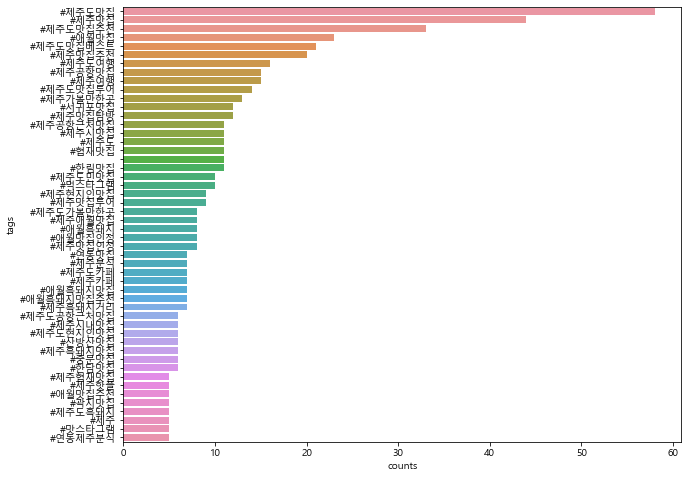

In [215]:
plt.figure(figsize= (10,8))
sns.barplot(data = tag_counts_df , x= 'counts', y ='tags')


* 워드 클라우드 그리기 

In [216]:
!pip install jupyter-c-kernel

In [217]:
conda install -c conda-forge wordcloud

^C

Note: you may need to restart the kernel to use updated packages.


In [1]:
from wordcloud import WordCloud
   # 에러시  ! pip install wordcloud 실행
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

(-0.5, 799.5, 399.5, -0.5)

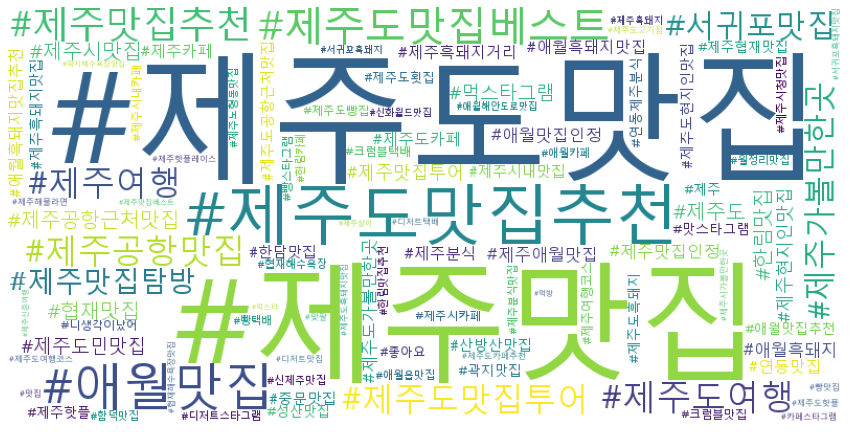

In [223]:
# 워드 클라우드 생성 
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words = 100 , 
                    relative_scaling = 0.3,
                    width = 800,
                    height = 400).generate_from_frequencies(tags_counts)
                    # .generate_from_frequecies(표현할 데이터)
plt.figure(figsize= (15,10))
plt.imshow(wordcloud)
plt.axis('off')


### 지도 시각화 folium

In [7]:
import pandas as pd 
raw_total = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/1_crawling_raw.xlsx')
raw_total.head()

,index,content,date,like,place,tags
0,0,길게 말 안합니다. 그냥 가시면 됩니다.낙지볶음 찐맛집이다. 정말 눈물 흘리면서 흡...,2022-02-17,"1,511",낙지로,"['#낙지로-', '#푸민_제주', '#제주도맛집', '#제주공항맛집', '#제주도..."
1,1,(광고)제주도에서 가장 맛있는 갈치요리 끝판왕 👑갈치왕!갈치요리는 무적권 여기가 진...,2022-02-18,0,NaN,['#제주도맛집']
2,2,(광고)지만 제주 공항에서 가깝고 (🚗공항에서 12분)오션뷰& 노을뷰를 보면서 먹을...,2022-02-18,0,NaN,"['#제주도맛집', '#제주맛집', '#제주도횟집', '#제주시횟집', '#제주공항..."
3,3,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,2022-02-18,0,NaN,"['#제주분식', '#제주분식', '#모당모당', '#돔베라면돔베김밥', '#제주맛..."
4,4,📍JEJU제주도로 여행가는 분들을 위한 찐맛집총정리🍽공항에서부터 한바퀴 시계방향으로...,2022-02-18,"1,593",제주도 제주,"['#자리돔횟집', '#유달식당', '#몰질식육식당', '#제주선채향', '#화순평..."


In [8]:
location_counts = raw_total['place'].value_counts()
location_counts

제주도 제주                       5
낙지로                          1
틴더타운리조트                      1
용담밭담                         1
제주도 애월읍                      1
자연스러운식당                      1
애월해안도로                       1
제주 범하다                       1
단백                           1
제주도                          1
동탄호수공원                       1
대우정식당                        1
규태네 양곱창                      1
이자카야달                        1
제주도 곽지해수욕장                   1
환상의 섬 Jeju Island            1
경기도 오산                       1
어박사                          1
Jeju Island                  1
현옥식당                         1
공공시                          1
Jeju-do                      1
주미담-술과이야기가있는곳                1
제주 씨에스호텔                     1
알동네집                         1
신화테마파크 Shinhwa Theme Park    1
이어도전복해물전문점                   1
제주도 서귀포시 중문                  1
도두동 무지개 해안도로                 1
제주 아라 아이파크                   1
애월찜                          1
Name: place, dtype: int64

In [9]:
# df로 변환 
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
제주도 제주,5
낙지로,1
틴더타운리조트,1
용담밭담,1
제주도 애월읍,1


In [10]:
locations = list(location_counts.index)
locations

['제주도 제주',
 '낙지로',
 '틴더타운리조트',
 '용담밭담',
 '제주도 애월읍',
 '자연스러운식당',
 '애월해안도로',
 '제주 범하다',
 '단백',
 '제주도',
 '동탄호수공원',
 '대우정식당',
 '규태네 양곱창',
 '이자카야달',
 '제주도 곽지해수욕장',
 '환상의 섬 Jeju Island',
 '경기도 오산',
 '어박사',
 'Jeju Island',
 '현옥식당',
 '공공시',
 'Jeju-do',
 '주미담-술과이야기가있는곳',
 '제주 씨에스호텔',
 '알동네집',
 '신화테마파크 Shinhwa Theme Park',
 '이어도전복해물전문점',
 '제주도 서귀포시 중문',
 '도두동 무지개 해안도로',
 '제주 아라 아이파크',
 '애월찜']

* 카카오 검색 API

In [240]:
# 예제 5-29 카카오 검색 API 사용 예시

import requests

searching = '송곡고등학교'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)

headers = {
    "Authorization": "KakaoAK 6792a64da2e7c58ad57d5b7fb306b326"     
    # 입력시 반드시  KakaoAK 뒤에 한 칸 띄우고 API키 값을 적어야 합니다. 
}

places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 중랑구 망우동 239-1',
  'category_group_code': 'SC4',
  'category_group_name': '학교',
  'category_name': '교육,학문 > 학교 > 고등학교',
  'distance': '',
  'id': '7956942',
  'phone': '02-435-0660',
  'place_name': '송곡고등학교',
  'place_url': 'http://place.map.kakao.com/7956942',
  'road_address_name': '서울 중랑구 양원역로 50',
  'x': '127.10688944171',
  'y': '37.6057672953561'},
 {'address_name': '서울 중랑구 망우동 252-1',
  'category_group_code': 'SC4',
  'category_group_name': '학교',
  'category_name': '교육,학문 > 학교 > 고등학교',
  'distance': '',
  'id': '14656496',
  'phone': '02-434-4598',
  'place_name': '송곡여자고등학교',
  'place_url': 'http://place.map.kakao.com/14656496',
  'road_address_name': '서울 중랑구 양원역로 67',
  'x': '127.104970287365',
  'y': '37.6068754330064'},
 {'address_name': '서울 중랑구 망우본동 252-1',
  'category_group_code': 'SC4',
  'category_group_name': '학교',
  'category_name': '교육,학문 > 학교 > 고등학교 > 특성화고등학교',
  'distance': '',
  'id': '13127841',
  'phone': '02-432-1837',
  'place_name': '송곡관광고등

In [241]:
# 예제 5-30 카카오 로컬 API를 활용한 장소 검색 함수 만들기
def find_places(searching):
    # ① 접속URL 만들기
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    # ② headers 입력하기
    headers = {
    "Authorization": "KakaoAK 6792a64da2e7c58ad57d5b7fb306b326" # kakao API
    }
    # ③ API 요청&정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    # ④ 필요한 정보 선택하기
    place = places[0] 
    name = place['place_name']
    x=place['x'] # 경도
    y=place['y'] # 위도 
    data = [name, x, y, searching] 
    
    return data

In [242]:
data = find_places('제주공항')
data 

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

* 인스타그램 위치명에 대한 위치정보

In [243]:
import time

location_inform = []
for location in locations :
    try :
        data = find_places(location)
        location_inform.append(data) # 이중리스트 ? 
        time.sleep(0.5)
    except: 
        pass 
location_inform

[['제주특별자치도의회 의원회관(1층, 대회의실)', '126.49950229128', '33.4903746154992', '제주도 제주'],
 ['낙지로', '126.494395960969', '33.4886210266593', '낙지로'],
 ['용담밭담', '126.510146926148', '33.5011695368784', '용담밭담'],
 ['올레길 16코스(고내-광령 올레)', '126.38979561557086', '33.46649759191228', '제주도 애월읍'],
 ['자연스러운식당', '126.53261178663291', '33.243399160632066', '자연스러운식당'],
 ['애월해안도로', '126.36867872098', '33.4781232943703', '애월해안도로'],
 ['범하다', '126.8998588271188', '33.41273972191753', '제주 범하다'],
 ['단백', '126.931908687227', '33.4617488070486', '단백'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도'],
 ['동탄호수공원', '127.10452210465446', '37.16783438705687', '동탄호수공원'],
 ['대우정', '126.519586532616', '33.4989236665696', '대우정식당'],
 ['규태네양곱창 본점', '126.486060276427', '33.4862281727332', '규태네 양곱창'],
 ['제주이자카야달', '126.39278163821417', '33.484724331694885', '이자카야달'],
 ['곽지해수욕장', '126.304673157235', '33.4506575078278', '제주도 곽지해수욕장'],
 ['물향기수목원', '127.05953110156278', '37.1663085028355', '경기도 오산'],
 ['어박사 한림본점', '126.258114

: location_inform 에는 제주도 맛집 결과의 위치정보가 나와있다.

In [245]:
# 위치정보 df로 저장 
location_inform_df =pd.DataFrame(location_inform,
                                columns = ['카카오 위치명', '경도','위도','검색명'])
# 맛집 위치정보 리스트를 엑셀파일로
location_inform_df.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/jeju_food_location.xlsx' , index =False)

* 맛집 위치정보 파일 호출

In [5]:
location_inform_df = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/jeju_food_location.xlsx')
location_inform_df.head()

,카카오 위치명,경도,위도,검색명
0,"제주특별자치도의회 의원회관(1층, 대회의실)",126.499502,33.490375,제주도 제주
1,낙지로,126.494396,33.488621,낙지로
2,용담밭담,126.510147,33.501170,용담밭담
3,올레길 16코스(고내-광령 올레),126.389796,33.466498,제주도 애월읍
4,자연스러운식당,126.532612,33.243399,자연스러운식당


In [11]:
location_counts_df.head()

,place
제주도 제주,5
낙지로,1
틴더타운리조트,1
용담밭담,1
제주도 애월읍,1


* 위치정보df 와 해시태그 횟수 df 를 합침 : 기준열 - 검색명 

In [12]:
location_data = pd.merge(location_inform_df, location_counts_df , 
                         left_on = '검색명', how ='inner', right_index = True)
location_data.head()

,카카오 위치명,경도,위도,검색명,place
0,"제주특별자치도의회 의원회관(1층, 대회의실)",126.499502,33.490375,제주도 제주,5
1,낙지로,126.494396,33.488621,낙지로,1
2,용담밭담,126.510147,33.501170,용담밭담,1
3,올레길 16코스(고내-광령 올레),126.389796,33.466498,제주도 애월읍,1
4,자연스러운식당,126.532612,33.243399,자연스러운식당,1


: how = 'inner'  교집합만 , left_on = 왼쪽 inform_df의 '검색명'을 기준키로 

In [13]:
# 엑셀로 저장 
location_data.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/location_inform.xlsx', index = False)


### Folium 지도 시각화 

In [14]:
location_data = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   카카오 위치명  27 non-null     object 
 1   경도       27 non-null     float64
 2   위도       27 non-null     float64
 3   검색명      27 non-null     object 
 4   place    27 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB


In [15]:
!pip install folium
import folium

* 지도 표시 :  
지도의 중심위치 좌표 (한라산) / 위치별 위도 /경도 데이터 

In [16]:
Mt_Hanla =[33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11) # 지도데이터

for i in range(len(location_data)):
    name = location_data ['카카오 위치명'][i]    # 공식명칭
    count = location_data ['place'][i]           # 게시글 개수
    size = int(count)*2 
    long = float(location_data['위도'][i])      #위도
    lat = float(location_data['경도'][i])       # 경도
    
    folium.CircleMarker((long,lat), radius = size, color='red', popup=name).add_to(map_jeju)
    
map_jeju


folium.CircleMarker((long,lat), radius = size, color='red', popup=name)  # 원생성  
.add_to(map_jeju) : 지도에 추가 

In [17]:
# 지도 저장 (html 파일)
map_jeju.save('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/jeju.html')

* 그룹으로 표시 (서클 마커 집합)

In [20]:
location_data.head()

,카카오 위치명,경도,위도,검색명,place
0,"제주특별자치도의회 의원회관(1층, 대회의실)",126.499502,33.490375,제주도 제주,5
1,낙지로,126.494396,33.488621,낙지로,1
2,용담밭담,126.510147,33.501170,용담밭담,1
3,올레길 16코스(고내-광령 올레),126.389796,33.466498,제주도 애월읍,1
4,자연스러운식당,126.532612,33.243399,자연스러운식당,1


In [19]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   카카오 위치명  27 non-null     object 
 1   경도       27 non-null     float64
 2   위도       27 non-null     float64
 3   검색명      27 non-null     object 
 4   place    27 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB


In [25]:
# 맛집 정보들을 리스트에 넣기 
from folium.plugins import MarkerCluster 
locations = [] 
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i] #  한 레코드 씩 
    locations.append((float(data['위도']),float(data['경도']))) # 리스트에 맛집 별 위도,경도 튜플로 추가 
    names.append(data['검색명'])


In [27]:
locations[:5]

[(33.4903746154992, 126.49950229128),
 (33.4886210266593, 126.494395960969),
 (33.5011695368784, 126.510146926148),
 (33.46649759191228, 126.3897956155709),
 (33.24339916063207, 126.5326117866329)]

In [28]:
names[:5]

['제주도 제주', '낙지로', '용담밭담', '제주도 애월읍', '자연스러운식당']

In [29]:
icon_create_function = """\
function(cluster) {
    return L.divIcon({
    html : '<b>' + cluster.getChildCount() + '</b>',
    className : 'marker-cluster marker-cluster-large',
    iconsize : new L.Point(30,30)
    }); 
}"""

Mt_Hanla =[33.362500, 126.533694]ㅃ
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11) # 지도데이터

marker_cluster = MarkerCluster(
    locations = locations , popups = names,
    name = 'Jeju',
    overlay = True,
    control = True,
    icon_create_function = icon_create_function)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [30]:
# 지도 저장 
map_jeju2.save('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/jeju.html2')